In [1]:
import pandas as pd

In [2]:
import tensorflow.keras as tf

2022-06-25 16:17:35.360193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-06-25 16:17:35.360275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("sales_train.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


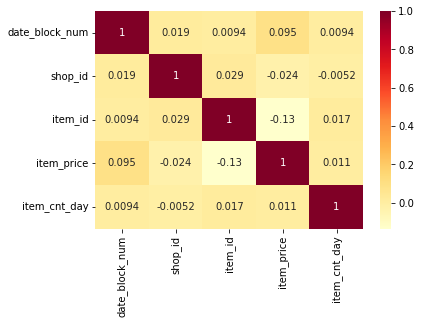

In [9]:
sns.heatmap(data.corr(), annot=True, cmap = "YlOrRd")

In [10]:
data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
Y = data["item_cnt_day"]
X = data.drop(["item_cnt_day", "date"], axis = 1)

In [12]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, random_state = 2)

In [13]:
X_train.head()

,date_block_num,shop_id,item_id,item_price
416120,3,31,9921,349.0
882620,8,7,11967,499.0
1455587,13,57,14720,149.0
2498674,26,39,12214,3999.0
10867,0,19,6668,4990.0


In [14]:
model = tf.Sequential([
    tf.layers.Dense(128, activation = "relu"),
    tf.layers.Dense(64, activation = "relu"),
    tf.layers.Dense(32, activation = "relu"),
    tf.layers.Dense(1),
])

2022-06-25 16:17:48.434198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-06-25 16:17:48.434259: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-25 16:17:48.434292: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Mikael-Nias-PC): /proc/driver/nvidia/version does not exist
2022-06-25 16:17:48.434909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.compile(
    loss="mse",
    optimizer=tf.optimizers.Adam(),
    metrics="mse"
)

In [16]:
model

In [17]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
68809/68809 [==============================] - 275s 4ms/step - loss: 17.8970 - mse: 17.8970
Epoch 2/5
68809/68809 [==============================] - 290s 4ms/step - loss: 4.9486 - mse: 4.9486
Epoch 3/5
68809/68809 [==============================] - 279s 4ms/step - loss: 4.9297 - mse: 4.9297
Epoch 4/5
68809/68809 [==============================] - 296s 4ms/step - loss: 4.9295 - mse: 4.9295
Epoch 5/5
68809/68809 [==============================] - 193s 3ms/step - loss: 4.9295 - mse: 4.9295


In [18]:
Y_pred = model.predict(X_test)

22937/22937 [==============================] - 43s 2ms/step


In [19]:
from sklearn.metrics import mean_squared_error
import math

In [20]:
rms = math.sqrt(mean_squared_error(Y_test, Y_pred, squared=False))

In [21]:
print(rms)

1.8857687088769894
